In [1]:
from tqdm import tqdm
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, AveragePooling2D

import os
import cv2
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [3]:
DATADIR = 'Datasets/Train'
CATEGORIES = ['Fire', 'NoFire']

In [4]:
IMG_SIZE = 64
def create_training_data():
    training_data = []
    for category in CATEGORIES:  
        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
    return training_data

In [5]:
training_data = create_training_data()

In [6]:
X, y = [], []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X = X / 255.0

X.shape[1:]

In [11]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=2, activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 126, 126, 16)      448       
_________________________________________________________________
average_pooling2d_14 (Averag (None, 63, 63, 16)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 61, 61, 32)        4640      
_________________________________________________________________
average_pooling2d_15 (Averag (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 64)       

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
average_pooling2d_3 (Average (None, 15, 15, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
average_pooling2d_4 (Average (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)         

In [15]:
history = model.fit(X, y, batch_size=32, epochs=100, validation_split=0.3)

In [8]:
model_name = 'Fire-64x64-CNN-v1'
model.save(f'Model/{model_name}.h5')

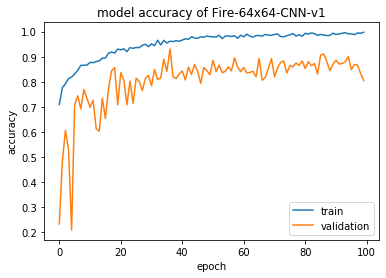

In [9]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title(f'model accuracy of {model_name}')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.savefig(f'{model_name}-accuracy')
plt.show()

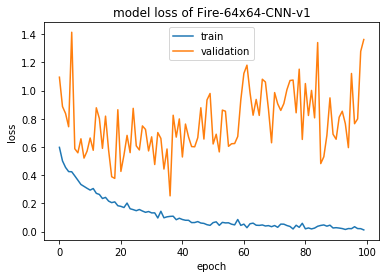

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(f'model loss of {model_name}')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.savefig(f'{model_name}-loss')
plt.show()